## Jordi Blasco Lozano
### Informe de Prácticas: Técnicas de Algoritmos de Búsqueda



## Introducción

El objetivo de esta práctica ha sido profundizar en técnicas de algoritmos de búsqueda aplicadas al problema de correspondencia de grafos (graph matching). El trabajo se ha centrado principalmente en la visualización, construcción y matching de grafos basados en puntos clave (keypoints) de imágenes del conjunto de datos Willow-ObjectClass.

Este conjunto de datos contiene imágenes de cinco categorías (car, duck, face, motorbike y winebottle), cada una anotada con keypoints específicos. El objetivo principal ha sido implementar y comparar diferentes algoritmos para establecer correspondencias entre keypoints de pares de imágenes, evaluando su precisión y rendimiento.

He estructurado el trabajo en varios módulos, dentro del directorio principal del programa encontramos las subcarpetas `archivos` y `results` y los notebooks de cada bloque requerido. Todo esto se detalla más adelante.

## DataLoader

Para facilitar el trabajo con los datos, decidí crear una clase externa llamada `DataLoader` que se encarga de leer y organizar todas las carpetas de datos, se encuentra dentro de la carpeta `arhivos`. Esta clase itera sobre la carpeta de `WILLOW-ObjectClass` y busca imágenes `.png` junto con sus correspondientes archivos `.mat` de keypoints. Guarda los paths de estas imagenes y keypoints en un diccionario que luego se usa para generar cada dataset de cada categoría, por ultimo estos datasets se guardan en un diccionario en el que la `key` es la categoria en minusculas y el `valor` el dataset con los paths de la categoría correspondiente, la función `load_data` se encarga de devolver este diccionario.

Esta clase evita la duplicación de código y proporciona un acceso facil a todos los datos.



## Visualización de Imágenes y Keypoints - Parte 1

El objetivo de esta primera parte de la práctica fue la visualización básica de las imágenes y sus keypoints. Cargué las imágenes y sus correspondientes keypoints. Redimensioné todas las imágenes a un tamaño uniforme de 256x256 píxeles. Ajusté las coordenadas de los keypoints para mantener su correspondencia con las imágenes redimensionadas. Finalmente visualicé los conjuntos de 8 imágenes aleatorias por categoria en grids de 2x4 con sus respectivos keypoints superpuestos


La función `load_img_and_keypoints_from_row` resultó super útil, ya que abstrae todo el proceso de carga y redimensionamiento, permitiéndome reutilizarla en las siguientes partes de la práctica. Al repetirla tantas veces en las partes de la práctica posteriores, me aprendí de memoria como buscar y redimensionar las imágenes, ajustar los keypoints y devolver todo redimensionado.



## Visualización de Imágenes y Keypoints - Parte 2

En esta segunda parte de la visualización se basaba en la construcción de grafos a partir de los keypoints. Para esto usamos dos métodos diferentes:

### Triangulación de Delaunay

La triangulación de Delaunay es una técnica geométrica que conecta puntos formando triángulos uniformes dentro de un grafo. Decidí implementar este método de forma manual, sin utilizar libreria Delaunay. Esto lo hice para entender mejor su funcionamiento desde el más bajo nivel. La función usaba 3 bucles anidados para iterar sobre todos los puntos y comprobar si formaban un triángulo válido. Realmente pensaba que iba a ser más dificil de implementar, estos puntos en los que iteraban los bucles hacian operaciones matemáticas sencillas como calcular la distancia entre dos puntos, comprobar si un punto estaba dentro de un triángulo, incluir en una lista los puntos validos, etc.

- pd(for ahmed): Este método creo que se usa mucho en tecnicas de reescalado de objetos 3D, generación de mallas en blender, etc. Supongo que existirán varias tecnicas de triangulación, no se si conoces Nanite, pero creo que es la tecnica de triangulación más avanzada para objetos 3D que existe actualmente. La usaba hace tiempo cuando hacia algún que otro juego en Unreal Engine 5.

### Grafos K-NN (K vecinos más cercanos)

Este otro tipo de técnica de triangulación se basa en la construcción de grafos K-NN, donde cada punto se conecta con sus K vecinos más cercanos. Esta función es bastante más sencilla que la triangulación de Delaunay, simplemente calcula las distancias entre todos los puntos y selecciona los K más cercanos, cuantos mas K más conexiones se generan. Esto se puede ver con los valores K (3, 5 y 7) que tomé para cada categoría de imagen, lo que permitió observar cómo la densidad de conexiones afecta a la estructura del grafo resultante.

La visualización de ambos métodos nos permite compararlos y entender sus diferencias: mientras que Delaunay genera una triangulación uniforme, K-NN tiende a crear más conexiones en áreas donde los puntos están más concentrados.



## Generación de Grafos Matcheados - Parte 1

Esta parte de la practica tenía como objetivo generar las correspondencias entre pares de grafos utilizando los grafos construidos anteriormente. El objetivo es encontrar qué keypoints de una imagen se corresponden con los de otra imagen de la misma categoría.

En esta parte he implementado tres funciones de `carga y plotteo de imagenes`, la función de `triangulacion Delunay`, para visualizar las triangulaciones de las imagenes, la función de `matching` con el uso del algoritmo húngaro que realiza un matching basandose en las distancias euclidianas entre los keypoints y finalmente las funciones que evaluan y generan las precisiones del matching para todas las categorías de imágenes.

Indagaré un poco más en las tres funciones de carga y plotteo de imagenes y kaypoints. `Load_img_and_keypoints_from_row` genera las imagenes y keypoints redimensionados y triangulados, esta nos va a servir solamente para visualizar las imagenes y keypoints de las categorias. Para hacer los matchings finales con el algoritmo húngaro, se usará la función de `load_keypoints_from_row` que solamente tiene en cuenta los keypoints de las imagenes ya que el algoritmo húngaro solo necesita los keypoints para hacer el matching, esto hará nuestro codigo más eficiente que si solo usaramos la función de `load_img_and_keypoints_from_row`. Finalmente, usaremos la función de `visualize_combined` que nos generará la visualización de las imagenes con los grafos 




## Generación de Grafos Matcheados - Parte 2

En esta parte veremos las diferencias entre los métodos de triangulación de Delaunay y K-NN en el matching de grafos, también se compararán todos los resultados obtenidos con cada tipo de matching y en si veremos cual es el mejor método para el matching de grafos. También veremos algunos problemas que he tenido y como creo que se podrian solucionar. Cargaremos primero todos los datos de los resultados de los matchings, luego visualizaremos en forma de graficas y tablas estos resultados y finalmente veremos las conclusiones de los resultados obtenidos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


resultados = './results/'

match433_rs = pd.read_csv(resultados + "(0.4,0.3,0.3)_results.csv")

baseline_rs = pd.read_csv(resultados + "baseline_results.csv")
enhanced_rs = pd.read_csv(resultados + "enhanced_results.csv")
duck_knn_rs = pd.read_csv(resultados + "duck_knn_results.csv")
duck_weight_sensitivity_rs = pd.read_csv(resultados + "duck_weight_sensitivity_results.csv")


In [3]:
match433_rs

,Category,Mean_Accuracy,Std_Deviation,Number_of_Pairs
0,car,0.6833,0.2988,66
1,duck,0.7667,0.2197,66
2,face,0.9348,0.1187,66
3,motorbike,0.8348,0.2253,66
4,winebottle,0.8576,0.1624,66


In [4]:
baseline_rs

,Category,Mean_Accuracy,Std_Deviation,Number_of_Pairs
0,car,0.7118,0.3007,780
1,duck,0.6753,0.2878,1225
2,face,0.8452,0.1879,5886
3,motorbike,0.8265,0.2302,780
4,winebottle,0.8826,0.1792,2145


In [5]:
enhanced_rs

,Category,Mean_Accuracy,Std_Deviation,Number_of_Pairs
0,car,0.6818,0.2959,66
1,duck,0.7864,0.2180,66
2,face,0.9303,0.1180,66
3,motorbike,0.8348,0.2253,66
4,winebottle,0.8879,0.1562,66


In [6]:
duck_knn_rs

,Method,Mean_Accuracy,Std_Deviation,Number_of_Pairs
0,KNN(3),0.6283,0.2149,1225
1,KNN(5),0.8202,0.1619,1225
2,KNN(7),0.9223,0.1021,1225


In [7]:
duck_weight_sensitivity_rs

,Weight_Combination,Mean_Accuracy,Std_Deviation,Number_of_Pairs
0,"(0.3, 0.3, 0.4)",0.7414,0.2809,1225
1,"(0.3, 0.4, 0.3)",0.7402,0.2820,1225
2,"(0.4, 0.3, 0.3)",0.7376,0.2847,1225
3,"(0.5, 0.2, 0.3)",0.7336,0.2853,1225
4,"(0.5, 0.3, 0.2)",0.7300,0.2839,1225
5,"(0.6, 0.2, 0.2)",0.7261,0.2851,1225


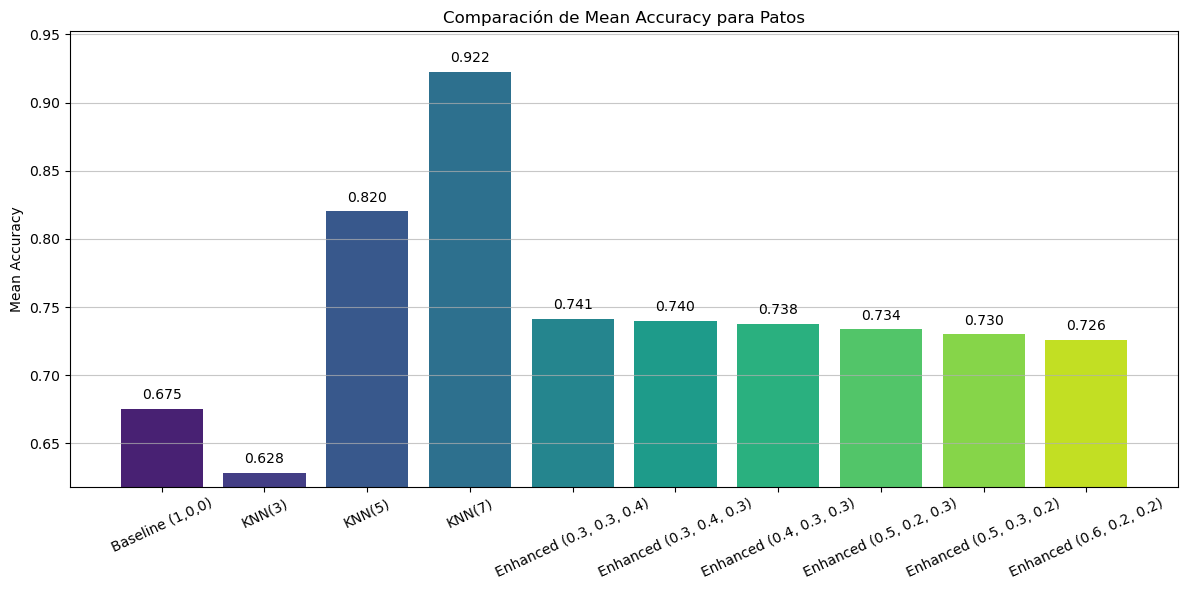

In [8]:
# Extraer el valor de Mean_Accuracy para 'duck' en baseline
baseline_duck = baseline_rs[baseline_rs['Category'] == 'duck']['Mean_Accuracy'].iloc[0]

# Seleccionar los 3 métodos KNN: KNN(3), KNN(5) y KNN(7)
knn_results = duck_knn_rs[duck_knn_rs['Method'].isin(['KNN(3)', 'KNN(5)', 'KNN(7)'])]

# Inicializar las listas de etiquetas y valores
x_labels = []
y_values = []

# Añadir baseline
x_labels.append('Baseline (1,0,0)')
y_values.append(baseline_duck)

# Añadir resultados de KNN para duck
for idx, row in knn_results.iterrows():
    x_labels.append(row['Method'])
    y_values.append(row['Mean_Accuracy'])

# Añadir los resultados de enhanced según la sensibilidad de pesos
for idx, row in duck_weight_sensitivity_rs.iterrows():
    x_labels.append(f"Enhanced {row['Weight_Combination']}")
    y_values.append(row['Mean_Accuracy'])

# Crear el gráfico de barras con una paleta de colores
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(x_labels))
bars = plt.bar(x_labels, y_values, color=colors)

plt.ylabel('Mean Accuracy')
plt.title('Comparación de Mean Accuracy para Patos')
plt.xticks(rotation=25)

# Ajustar el límite del eje Y para que quede más espacio sobre la barra más alta
y_min = min(y_values) - 0.01
y_max = max(y_values) + 0.03  # Sube el valor superior para más espacio
plt.ylim(y_min, y_max)

plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

# Agregar etiquetas de valor sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.3f}', 
             ha='center', va='bottom')

plt.show()

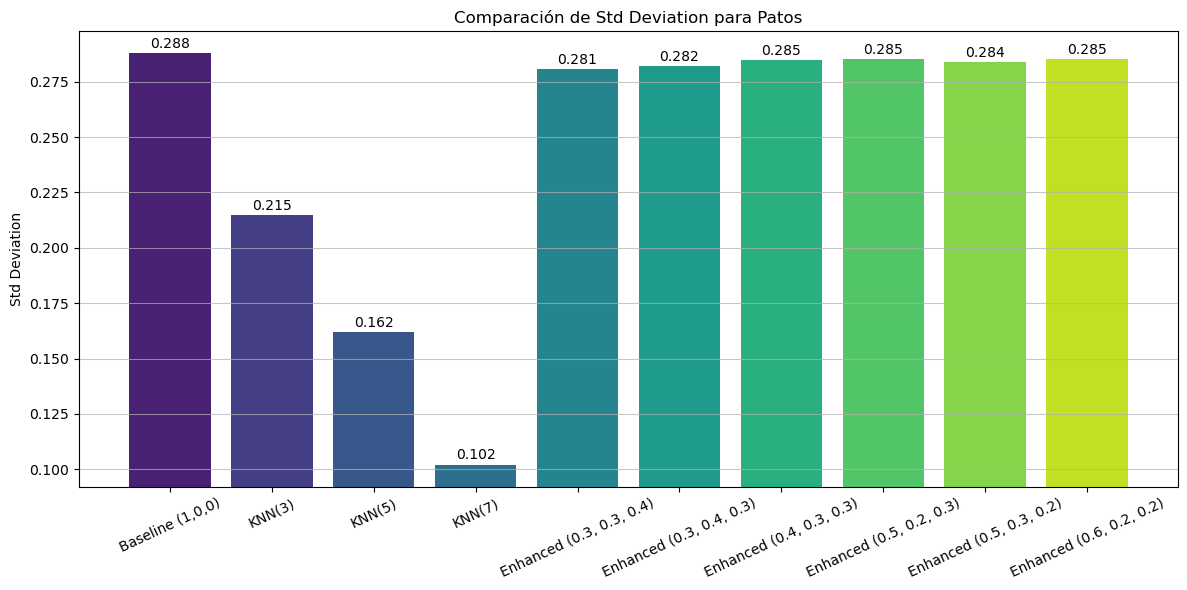

In [9]:
# Extraer la desviación estándar para 'duck' en baseline
baseline_duck_std = baseline_rs[baseline_rs['Category'] == 'duck']['Std_Deviation'].iloc[0]

# Filtrar los 3 métodos KNN: KNN(3), KNN(5) y KNN(7)
knn_results = duck_knn_rs[duck_knn_rs['Method'].isin(['KNN(3)', 'KNN(5)', 'KNN(7)'])]

# Inicializar las listas de etiquetas (x_labels) y valores (y_values)
x_labels = []
y_values = []

# Añadir baseline
x_labels.append('Baseline (1,0,0)')
y_values.append(baseline_duck_std)

# Añadir resultados de KNN (std dev)
for idx, row in knn_results.iterrows():
    x_labels.append(row['Method'])
    y_values.append(row['Std_Deviation'])

# Añadir los resultados de sensitivity de pesos (std dev) para el método enhanced
for idx, row in duck_weight_sensitivity_rs.iterrows():
    x_labels.append(f"Enhanced {row['Weight_Combination']}")
    y_values.append(row['Std_Deviation'])

# Crear el gráfico de barras con una paleta de colores
plt.figure(figsize=(12, 6))
colors = sns.color_palette("viridis", len(x_labels))
bars = plt.bar(x_labels, y_values, color=colors)

plt.ylabel('Std Deviation')
plt.title('Comparación de Std Deviation para Patos')
plt.xticks(rotation=25)

# Ajustar el límite del eje Y para que quede más espacio
y_min = min(y_values) - 0.01
# La desviación estándar no puede ser negativa, así que forzamos a 0 si min(y_values) < 0
if y_min < 0:
    y_min = 0
y_max = max(y_values) + 0.01
plt.ylim(y_min, y_max)

plt.grid(axis='y', alpha=0.7)
plt.tight_layout()

# Agregar etiquetas de valor sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, f'{yval:.3f}', 
             ha='center', va='bottom')

plt.show()

### Conclusiones sobre los resultados obtenidos

Como podemos observar en las tablas, pero sobre todo en los plots sobre la desviación y la media de las precisiones de los metodos utilizados con duck.